# Stock Prices vs Covid and WTI

In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [154]:
df= pd.read_csv("36companiesstockprice-USAcovid-WTI.csv",delimiter=";")

In [155]:
df

,Date,HP Close,NBR Close,PTEN Close,SMG Close,AVD Close,PK Close,PEB Close,CLDT Close,DRH Close,...,WTI Close,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,Lockdown
0,03/02/2020,40750000,101500000,7980000,123860001,18530001,22209999,24120001,16440001,9780000,...,4040000,11,3,0,0,0,0,0,0,0
1,04/02/2020,41669998,102500000,7910000,122809998,18879999,22990000,24780001,16690001,10060000,...,4100000,11,0,0,0,0,0,0,0,0
2,05/02/2020,43849998,113500000,8430000,123790001,19530001,23320000,25150000,17299999,10240000,...,4270000,11,0,0,0,0,0,0,0,0
3,06/02/2020,43799999,109000000,7050000,123059998,19100000,23530001,25180000,17209999,10260000,...,4130000,12,1,0,0,0,0,0,0,0
4,07/02/2020,42650002,108500000,7380000,122949997,18250000,23340000,24969999,17040001,10130000,...,4060000,12,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,25/03/2021,27590000,96510002,7400000,235369995,20090000,21430000,24459999,13920000,10540000,...,3620000,30084115,67549,547551,1411,133305295,87343622,47419832,2831442,1
289,26/03/2021,28459999,99050003,7470000,241419998,20700001,21870001,25250000,13980000,10640000,...,3810000,30161485,77370,548703,1152,136684688,89559225,48695172,3379393,1
290,29/03/2021,27430000,91519997,7120000,242990005,20160000,21610001,24389999,13470000,10330000,...,3630000,30336835,69282,550729,714,145812835,95015762,52614231,2350144,1
291,30/03/2021,27450001,92500000,7160000,244990005,20480000,22129999,24719999,13640000,10560000,...,3630000,30398261,61426,551616,887,147602345,96044046,53423486,1789510,1


In [171]:
cols= list(df.columns)

In [172]:
perc_cols= df.columns[1:38]

In [173]:
df_covid= df[df.columns[38:]].copy()

In [174]:
num_cols= df.describe().columns

In [175]:
dates= df["Date"]

## Scaling and Normalizing the data

### Stock Market Data

In [176]:
from sklearn import preprocessing

x = df[perc_cols].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [177]:
df.set_axis(perc_cols, axis=1, inplace=True)

In [178]:
df["Date"]=dates

In [179]:
df= pd.concat([df,df_covid],axis=1)

In [180]:
df= df[cols]

In [181]:
temp_df= df.iloc[0:1].copy()

In [182]:
for col in perc_cols:
    for i in range(293):
        df[col][i]= df[col][i]/temp_df[col][0]*100

In [183]:
df.to_excel("Norm_data.xlsx",index=False)

In [184]:
df

,Date,HP Close,NBR Close,PTEN Close,SMG Close,AVD Close,PK Close,PEB Close,CLDT Close,DRH Close,...,WTI Close,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,Lockdown
0,03/02/2020,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,11,3,0,0,0,0,0,0,0
1,04/02/2020,103.291585,101.098901,98.885350,97.729723,105.057774,104.511284,103.683036,101.971609,103.669725,...,102.033898,11,0,0,0,0,0,0,0,0
2,05/02/2020,111.091227,113.186813,107.165605,99.848649,114.450865,106.419902,105.747762,106.782318,106.028834,...,107.796610,11,0,0,0,0,0,0,0,0
3,06/02/2020,110.912340,108.241758,85.191083,98.270264,108.236979,107.634483,105.915173,106.072539,106.290957,...,103.050847,12,1,0,0,0,0,0,0,0
4,07/02/2020,106.797860,107.692308,90.445860,98.032424,95.953743,106.535576,104.743292,104.731861,104.587156,...,100.677966,12,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,25/03/2021,52.915921,94.516486,90.764331,341.102690,122.543335,95.488727,101.897310,80.126177,109.960682,...,85.762712,30084115,67549,547551,1411,133305295,87343622,47419832,2831442,1
289,26/03/2021,56.028619,97.307696,91.878981,354.183777,131.358377,98.033557,106.305798,80.599363,111.271298,...,92.203390,30161485,77370,548703,1152,136684688,89559225,48695172,3379393,1
290,29/03/2021,52.343470,89.032964,86.305732,357.578387,123.554895,96.529797,101.506685,76.577281,107.208388,...,86.101695,30336835,69282,550729,714,145812835,95015762,52614231,2350144,1
291,30/03/2021,52.415030,90.109890,86.942675,361.902711,128.179172,99.537305,103.348203,77.917975,110.222805,...,86.101695,30398261,61426,551616,887,147602345,96044046,53423486,1789510,1


### Covid Data

In [19]:
covid_avg= df_covid.rolling(window=5).mean()

In [20]:
covid_avg["Date"]= dates

In [21]:
col_covid= ["Date",'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
       'new_vaccinations', 'Lockdown']

In [22]:
covid_avg= covid_avg[col_covid].copy()

In [23]:
covid_avg= covid_avg.dropna().copy()

In [24]:
l= list(covid_avg.describe().columns)

In [25]:
for col in l:
    max= covid_avg[col].max()
    min= covid_avg[col].min()
    for i in covid_avg.index:
        covid_avg[col][i]= (covid_avg[col][i] - min) / (max - min)

## Checking for Outliers

Plotting  HP Close


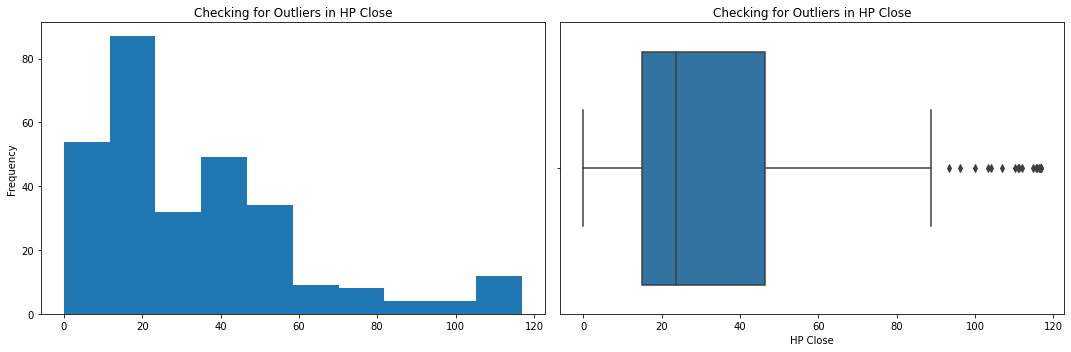

Plotting  NBR Close


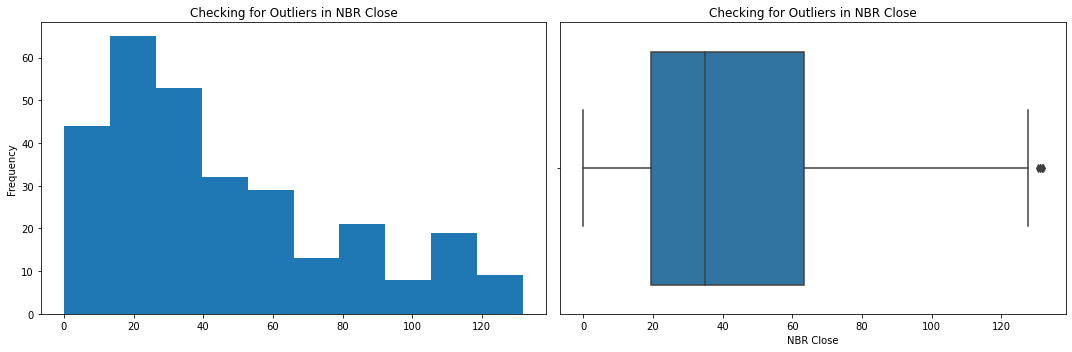

Plotting  PTEN Close


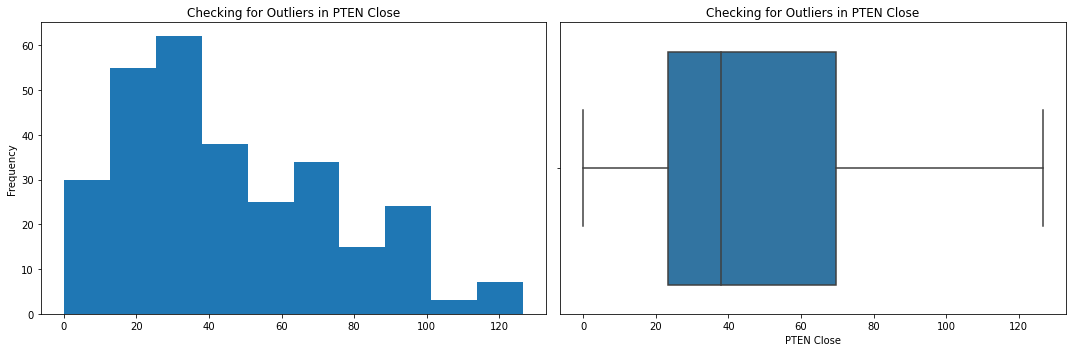

Plotting  SMG Close


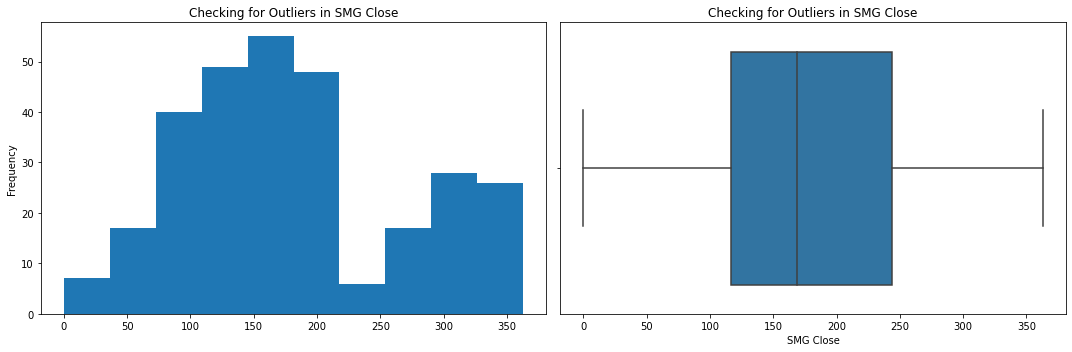

Plotting  AVD Close


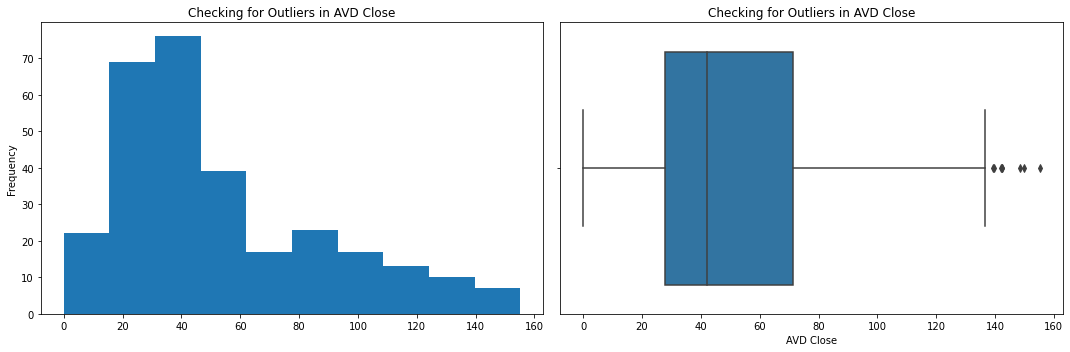

Plotting  PK Close


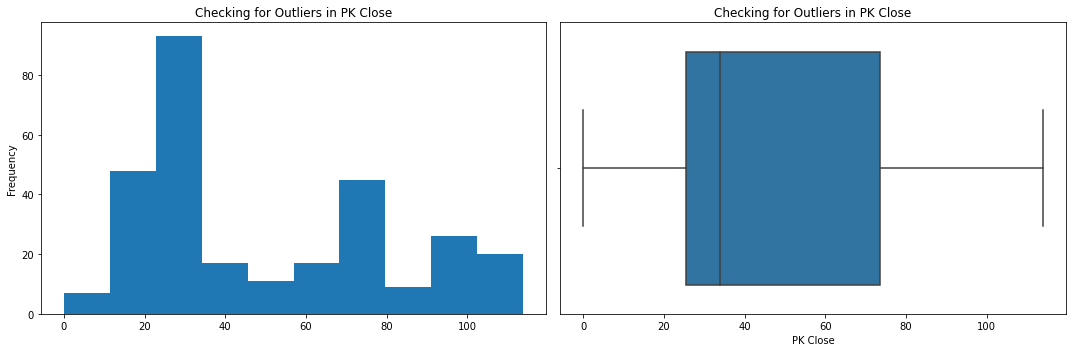

Plotting  PEB Close


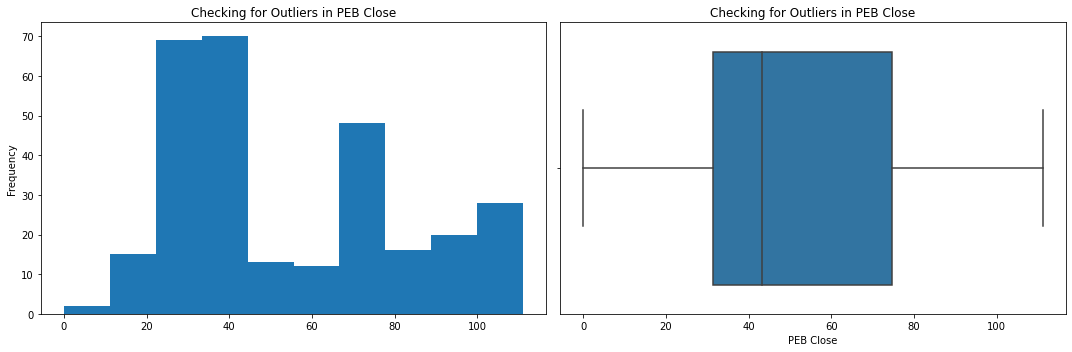

Plotting  CLDT Close


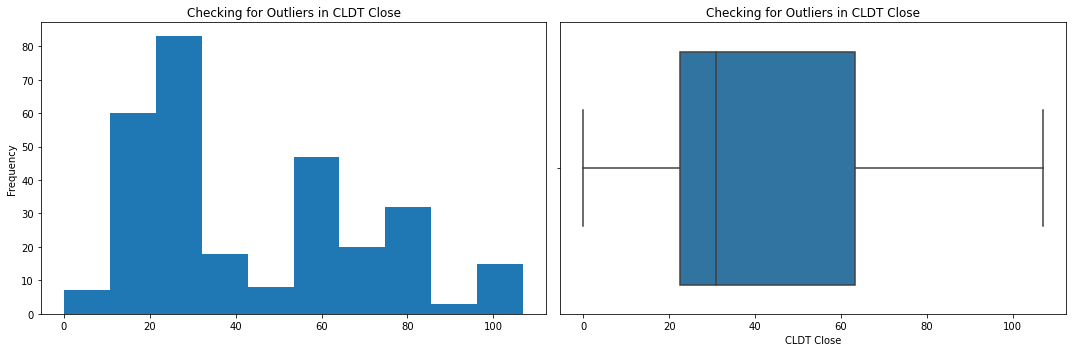

Plotting  DRH Close


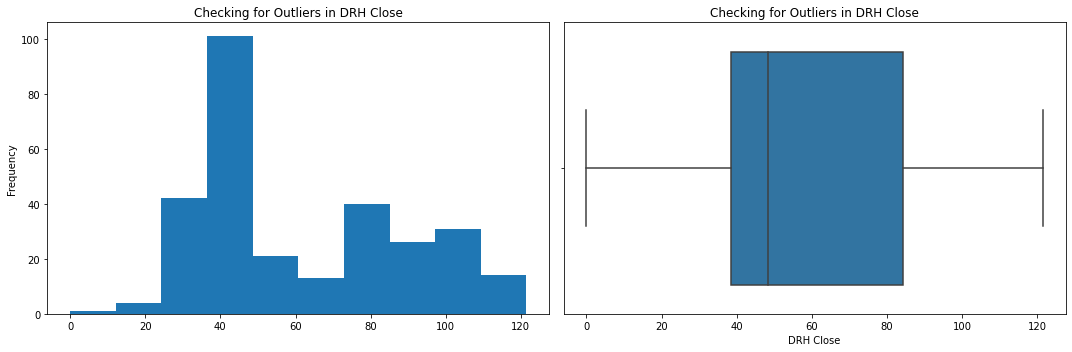

Plotting  HT Close


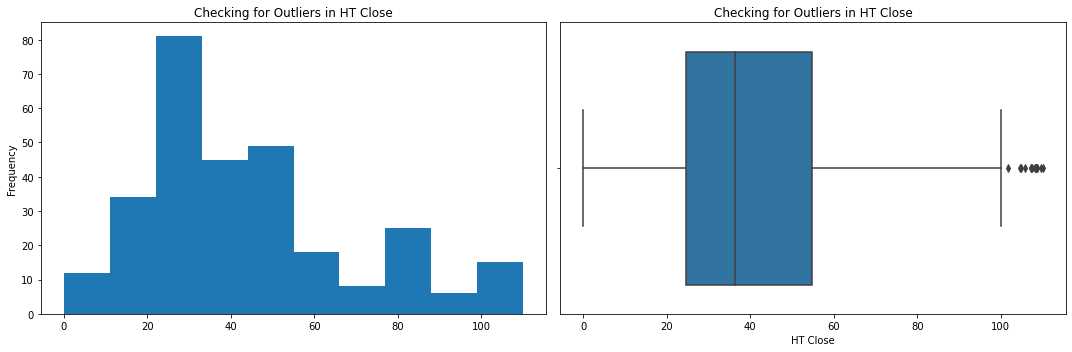

Plotting  XHR Close


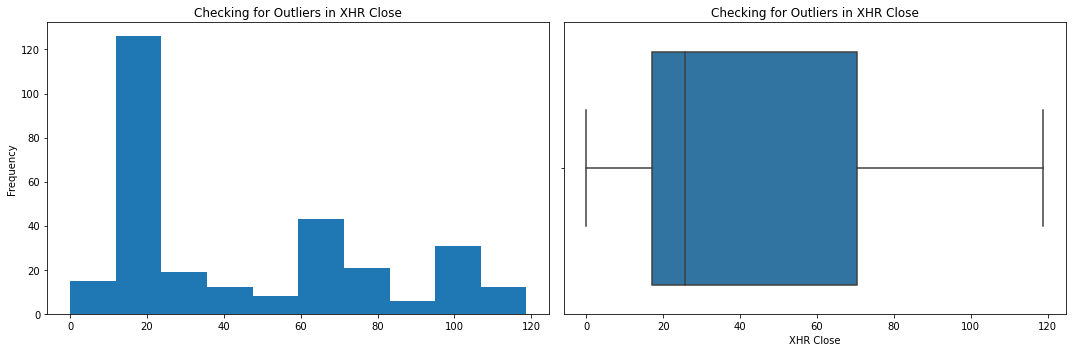

Plotting  INN Close


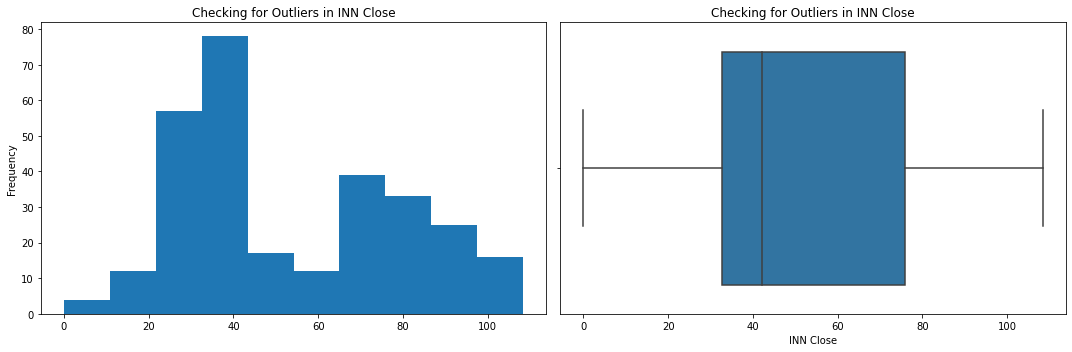

Plotting  XPO Close


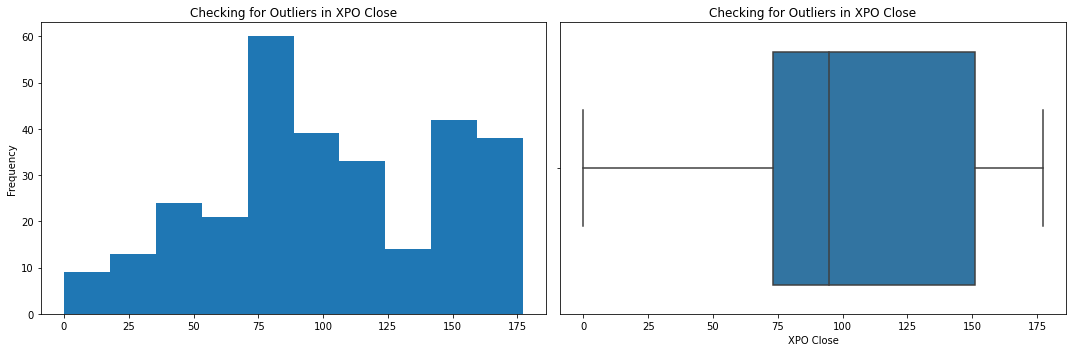

Plotting  AAWW Close


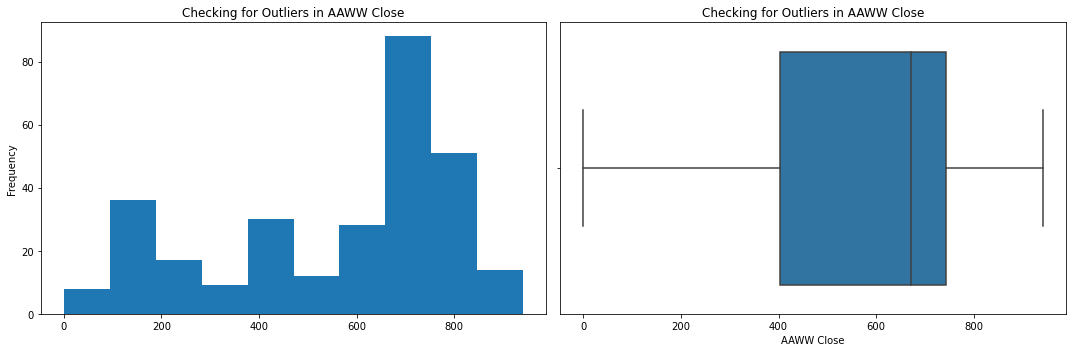

Plotting  ECHO Close


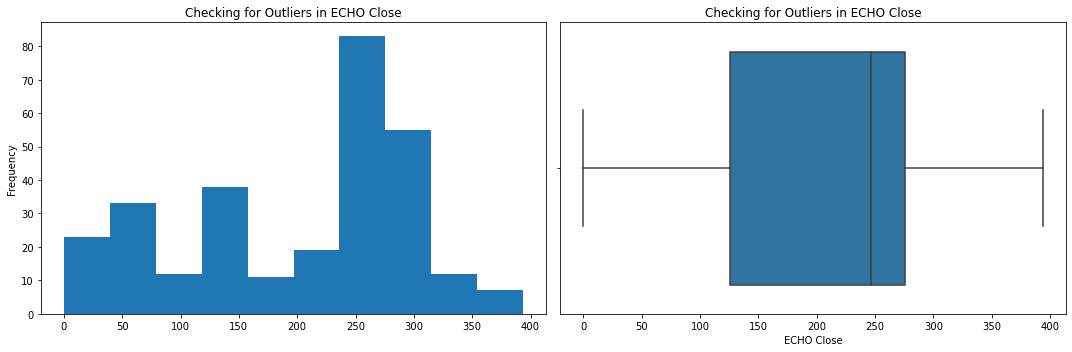

Plotting  FWRD Close


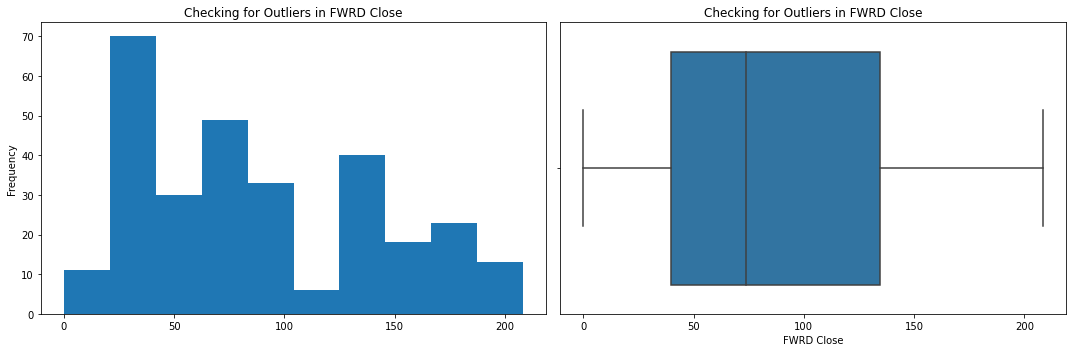

Plotting  HUBG Close


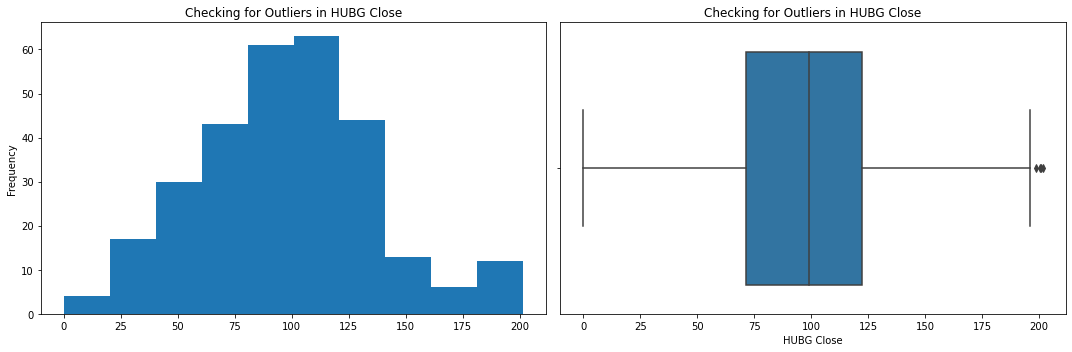

Plotting  VVV Close


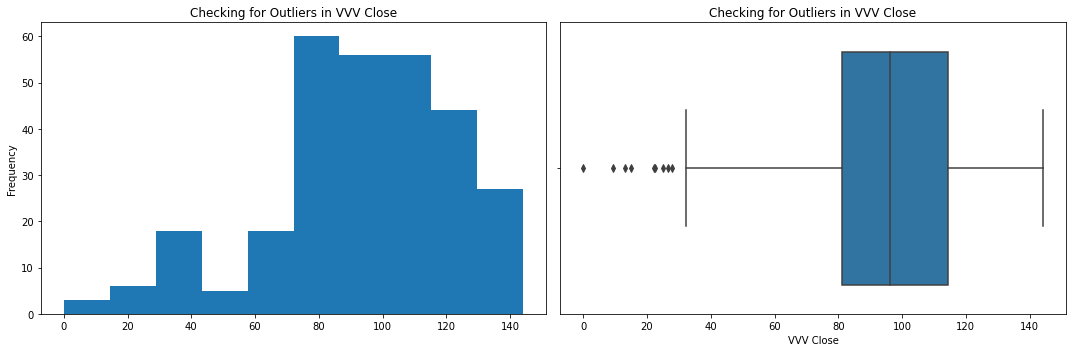

Plotting  ASIX Close


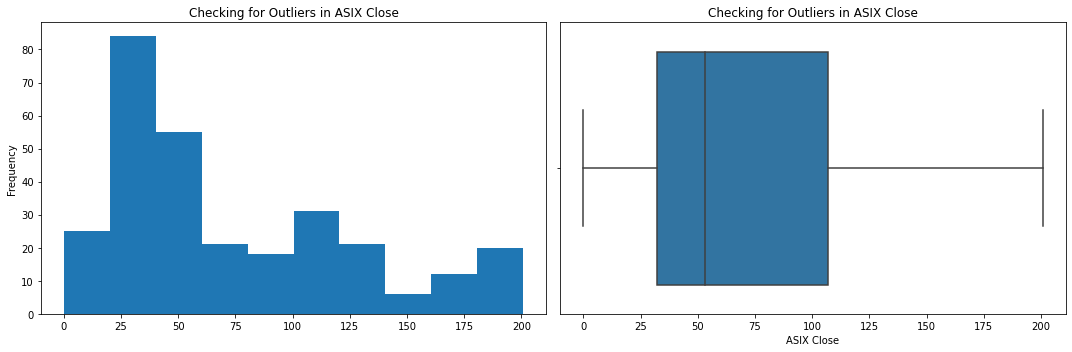

Plotting  HWKN Close


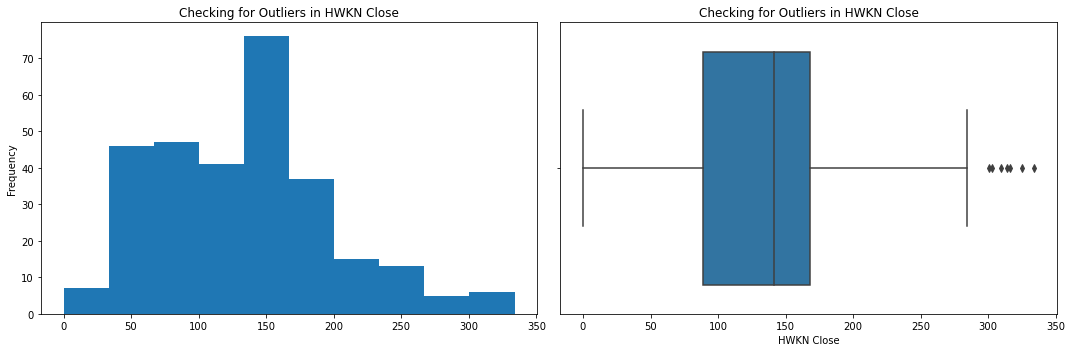

Plotting  KOP Close


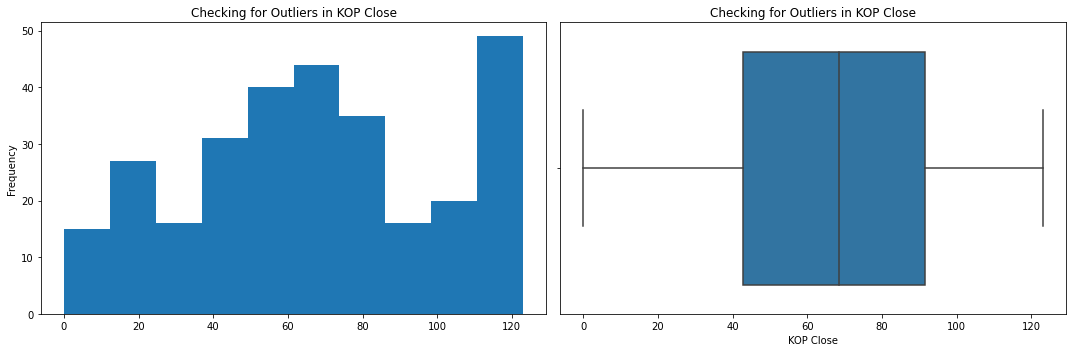

Plotting  TG Close


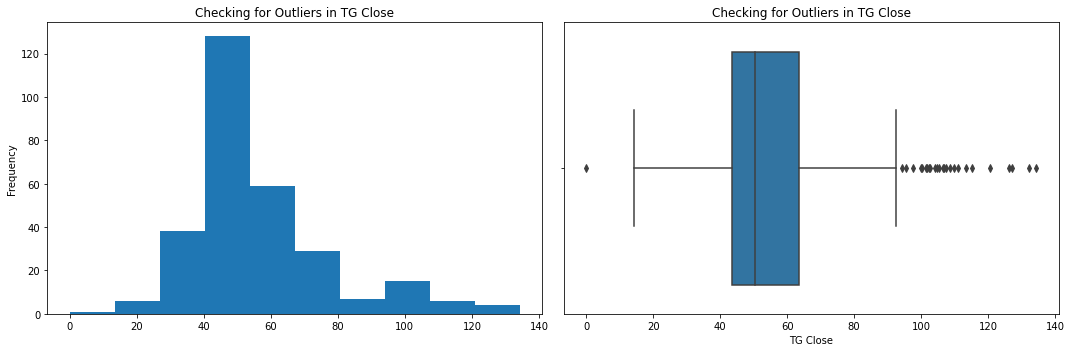

Plotting  EXP Close


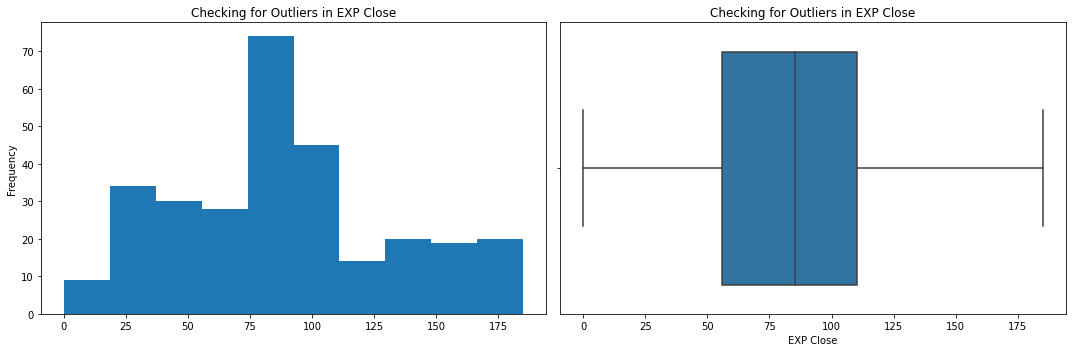

Plotting  USCRX Close


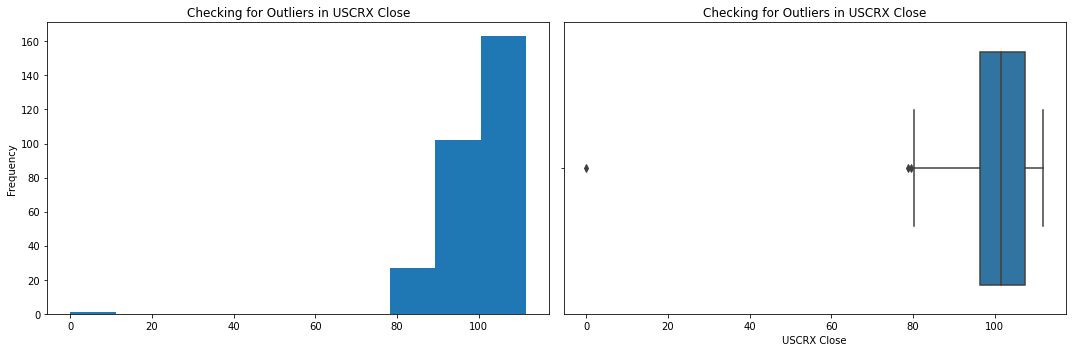

Plotting  CNK Close


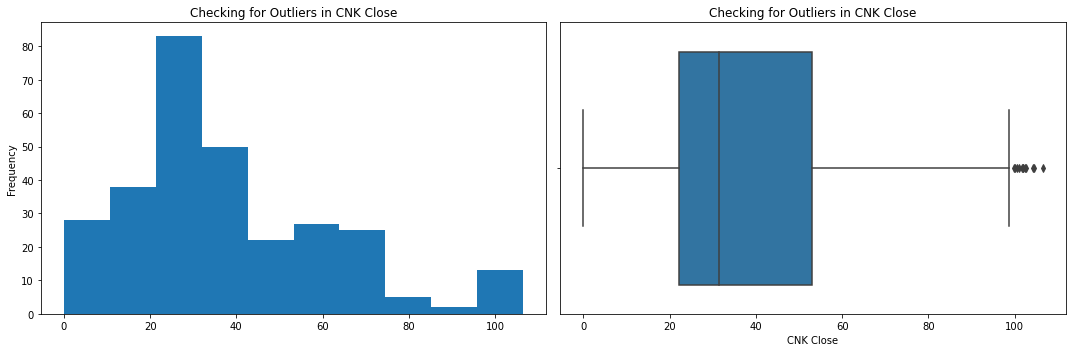

Plotting  WWE Close


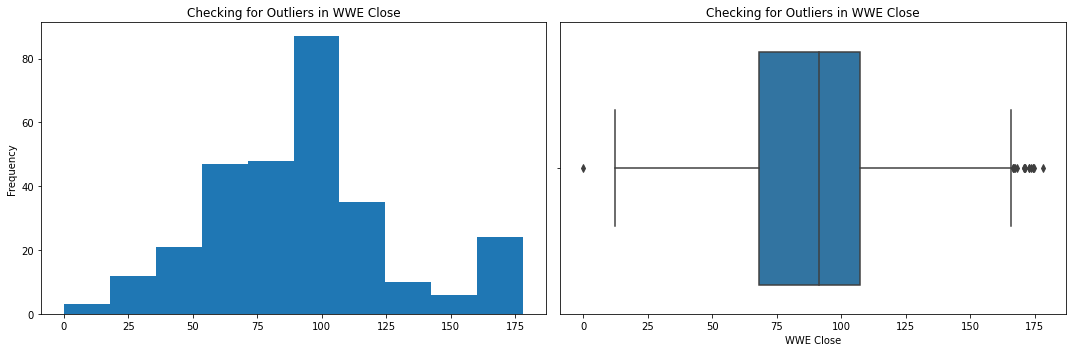

Plotting  JBLU Close


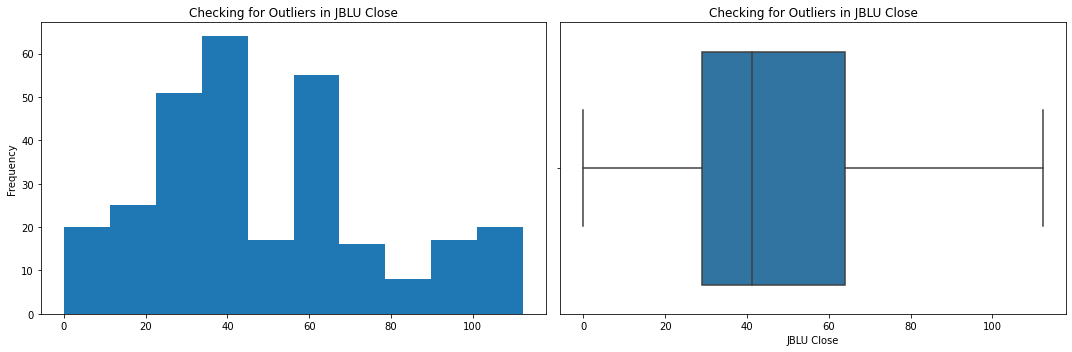

Plotting  ALGT Close


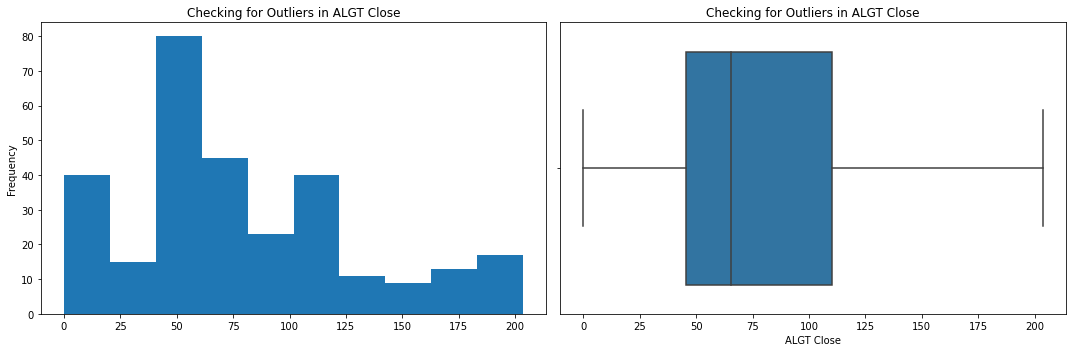

Plotting  HA Close


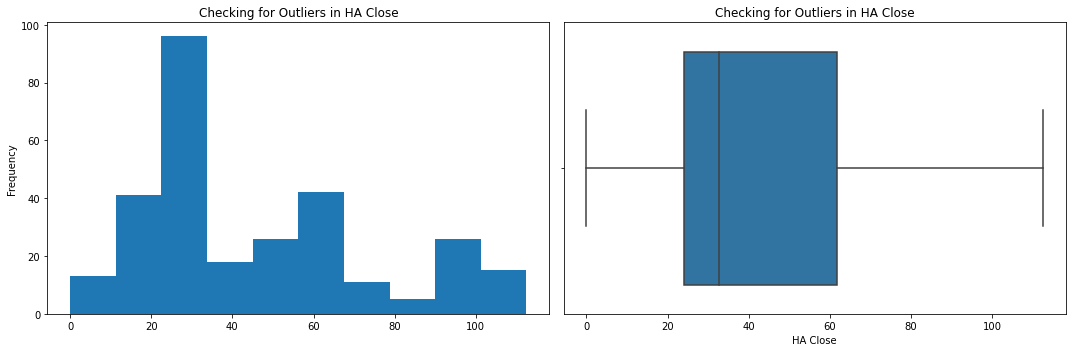

Plotting  SKYW Close


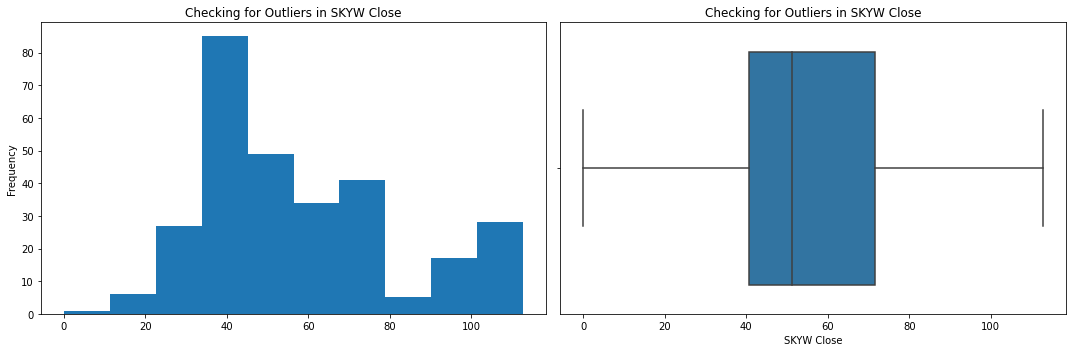

Plotting  ASH Close


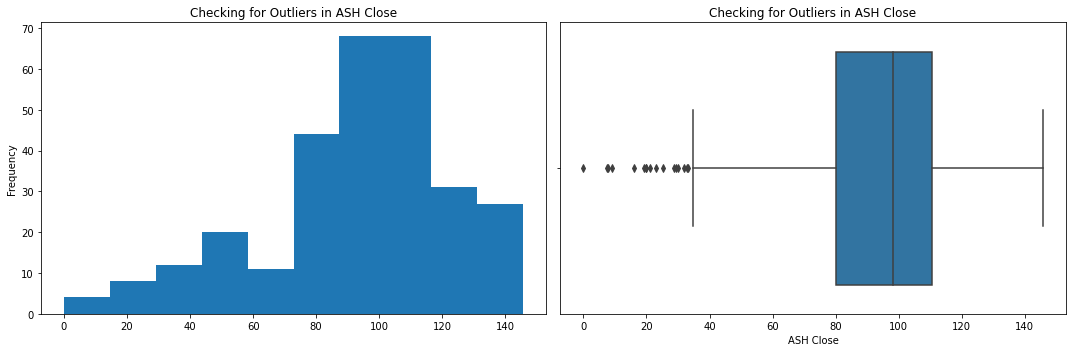

Plotting  CBT Close


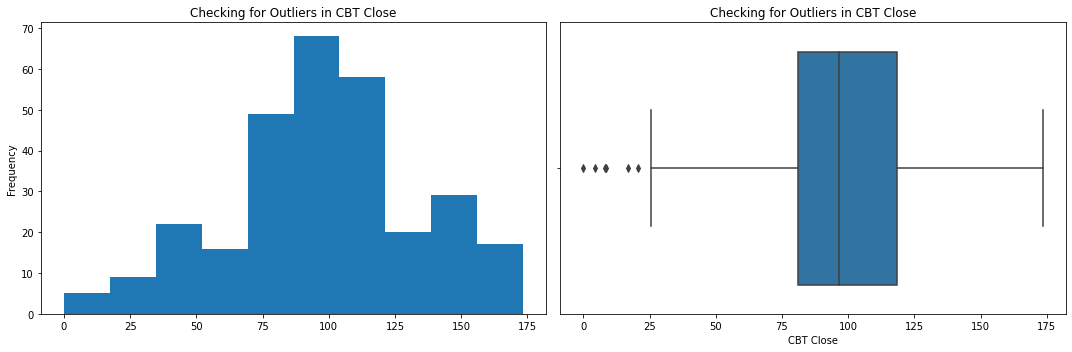

Plotting  CC Close


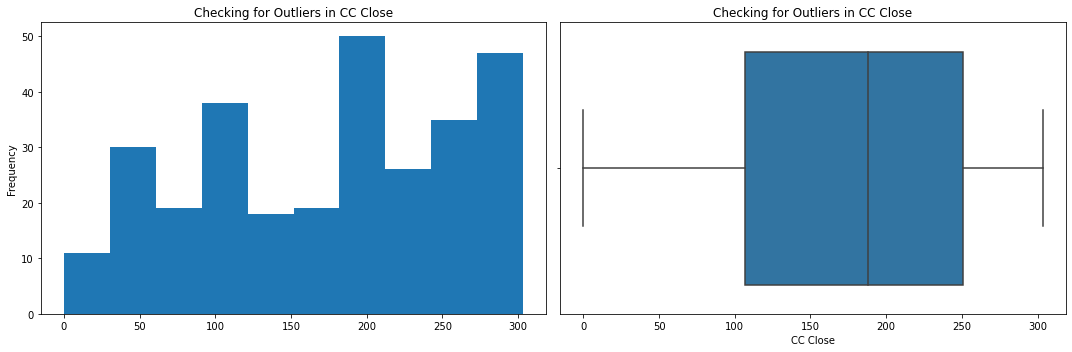

Plotting  OLN Close


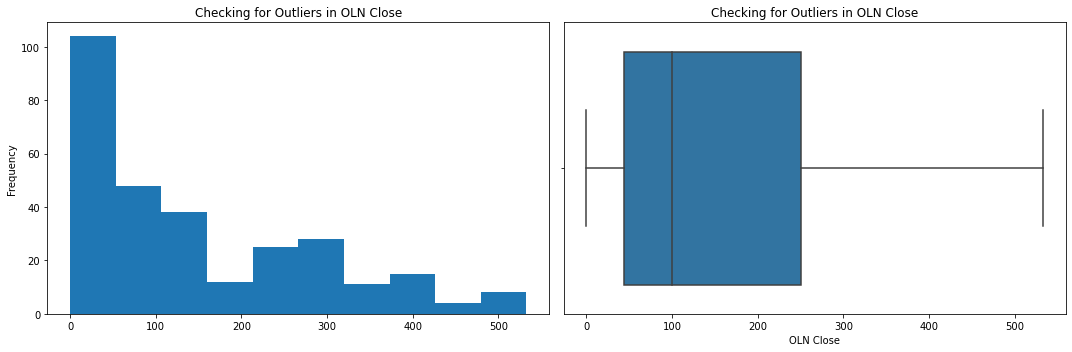

Plotting  GCP Close


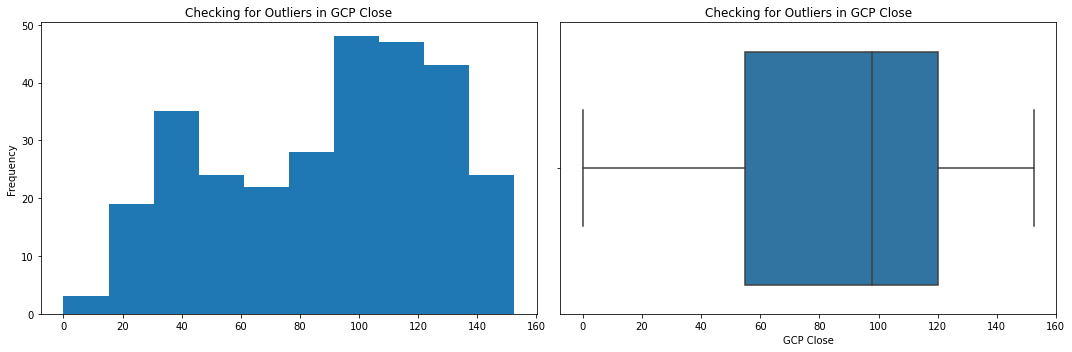

Plotting  LTHM Close


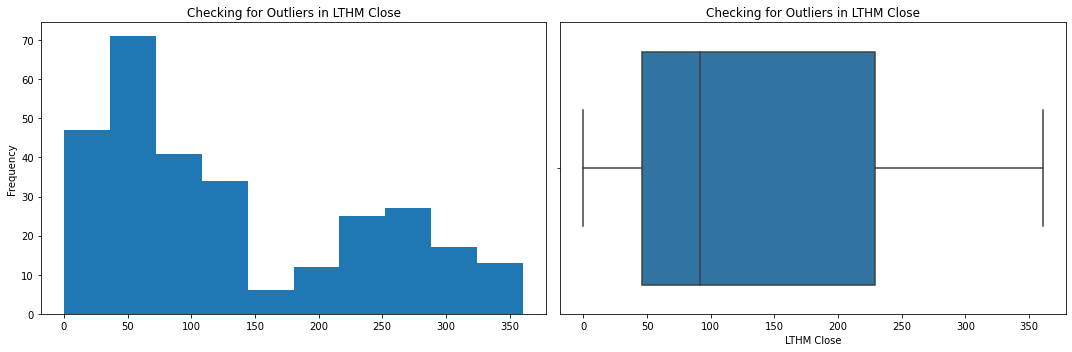

Plotting  WTI Close


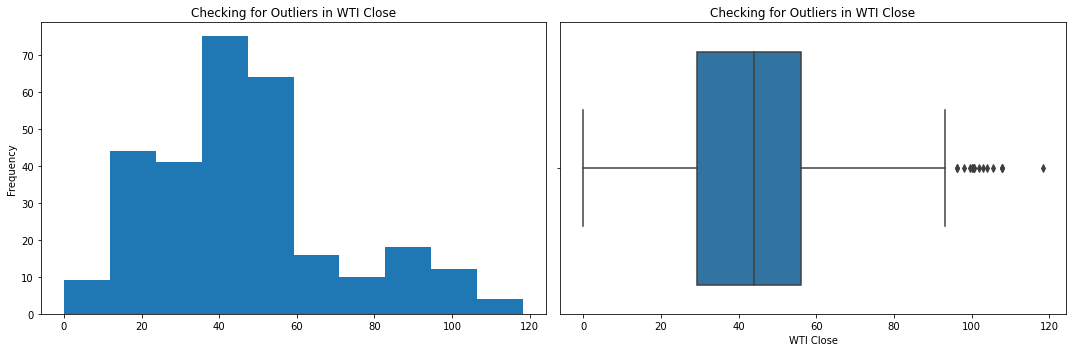

In [26]:
def data_info(df, column):
    
    fig = plt.figure(figsize=(15,5))
    
    ax1 = plt.subplot(121)
    df[column].plot.hist(ax=ax1);
    plt.title('Checking for Outliers in '+ column)
    
    ax2 = plt.subplot(122)
    sns.boxplot(x=df[column], ax=ax2);
    plt.title('Checking for Outliers in '+ column)
    
    fig.tight_layout()
    
    plt.show()
    

for column in perc_cols:
    print("Plotting ", column)
    data_info(df, column)

## Normalized line plot for Stocks Data

In [27]:
sns.set(rc={"figure.figsize":(20, 10)})

In [28]:
stock_list= []
group_list= []

In [29]:
for column in perc_cols:
    stock_list.append(column)
    group_list.append(df[column][292])

In [30]:
group_df= pd.DataFrame()
group_df['Stock']= stock_list
group_df['Average Norm Value']= group_list
group_df["Group"]= ""

In [31]:
for i in group_df.index:
    if group_df['Average Norm Value'][i]<100:
        group_df["Group"][i]="Loser"
    elif group_df['Average Norm Value'][i]>200:
        group_df["Group"][i]="Big Winner"
    else:
        group_df["Group"][i]="Winner"

In [32]:
group_df

,Stock,Average Norm Value,Group
0,HP Close,50.661893,Loser
1,NBR Close,91.153843,Loser
2,PTEN Close,86.464968,Loser
3,SMG Close,361.859459,Big Winner
4,AVD Close,127.167612,Winner
5,PK Close,96.356281,Loser
6,PEB Close,100.948655,Winner
7,CLDT Close,74.132486,Loser
8,DRH Close,106.815203,Winner
9,HT Close,74.765478,Loser


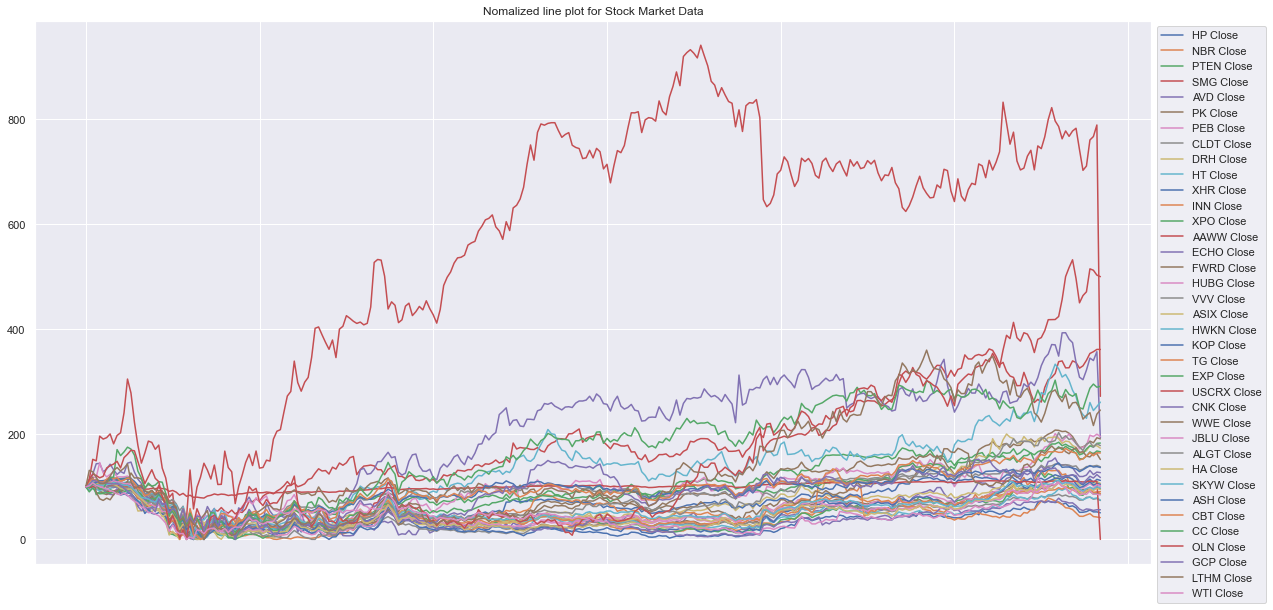

In [33]:
for column in perc_cols:
    plt.title('Nomalized line plot for Stock Market Data')
    g2 = sns.lineplot(y=df[column], x=df.index)
    g2.set(xticklabels=[])
    g2.set(xlabel=None)
    g2.set(ylabel=None)
    g2.tick_params(bottom=False) 
    plt.legend(labels=perc_cols, loc = 2, bbox_to_anchor = (1,1))

## Normalized line plot for Rolling Avg (5 days) Covid Data

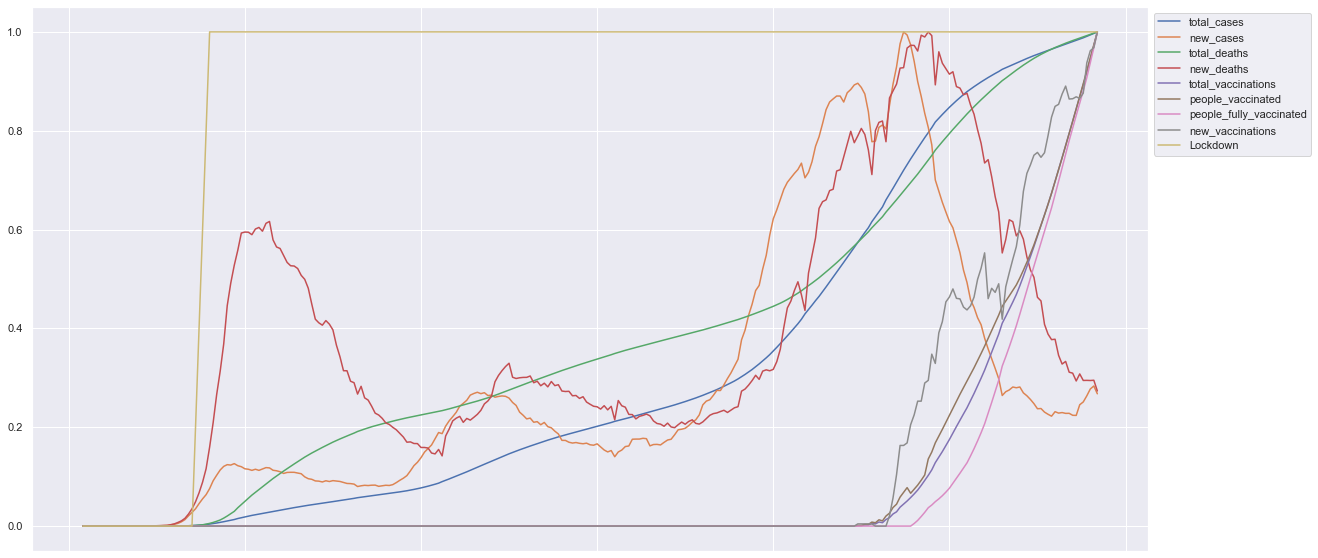

In [34]:
for column in l:
    g2= sns.lineplot(y=covid_avg[column], x=covid_avg.index)
    g2.set(xticklabels=[])  
    g2.set(xlabel=None)
    g2.set(ylabel=None)
    g2.tick_params(bottom=False)
    plt.legend(labels=l, loc = 2, bbox_to_anchor = (1,1))

In [35]:
covid_avg

,Date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,Lockdown
4,07/02/2020,0.000000e+00,2.345700e-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,10/02/2020,6.603028e-09,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,11/02/2020,1.980908e-08,7.819000e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,12/02/2020,3.301514e-08,7.819000e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8,13/02/2020,4.622120e-08,7.819000e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
288,25/03/2021,9.880861e-01,2.512002e-01,0.990047,0.294714,0.892306,0.895164,0.880842,0.876070,1.0
289,26/03/2021,9.909010e-01,2.634792e-01,0.992538,0.294870,0.918047,0.921646,0.907173,0.937168,1.0
290,29/03/2021,9.939443e-01,2.774353e-01,0.995074,0.294610,0.945095,0.947945,0.937175,0.961883,1.0
291,30/03/2021,9.970388e-01,2.835013e-01,0.997612,0.295131,0.972257,0.973964,0.967902,0.968197,1.0


In [36]:
df[["Date",'HP Close', 'NBR Close', 'PTEN Close', 'SMG Close', 'AVD Close',
       'PK Close', 'PEB Close', 'CLDT Close', 'DRH Close', 'HT Close',
       'XHR Close', 'INN Close', 'XPO Close', 'AAWW Close', 'ECHO Close',
       'FWRD Close', 'HUBG Close', 'VVV Close', 'ASIX Close', 'HWKN Close',
       'KOP Close', 'TG Close', 'EXP Close', 'USCRX Close', 'CNK Close',
       'WWE Close', 'JBLU Close', 'ALGT Close', 'HA Close', 'SKYW Close',
       'ASH Close', 'CBT Close', 'CC Close', 'OLN Close', 'GCP Close',
       'LTHM Close', 'WTI Close']].to_excel("Stocks_Norm.xlsx",index=False)

In [37]:
covid_avg.to_excel("Covid_Norm.xlsx",index=False)

# I. WTI VS STOCK PRICES

## Correlation for Stock Market Data

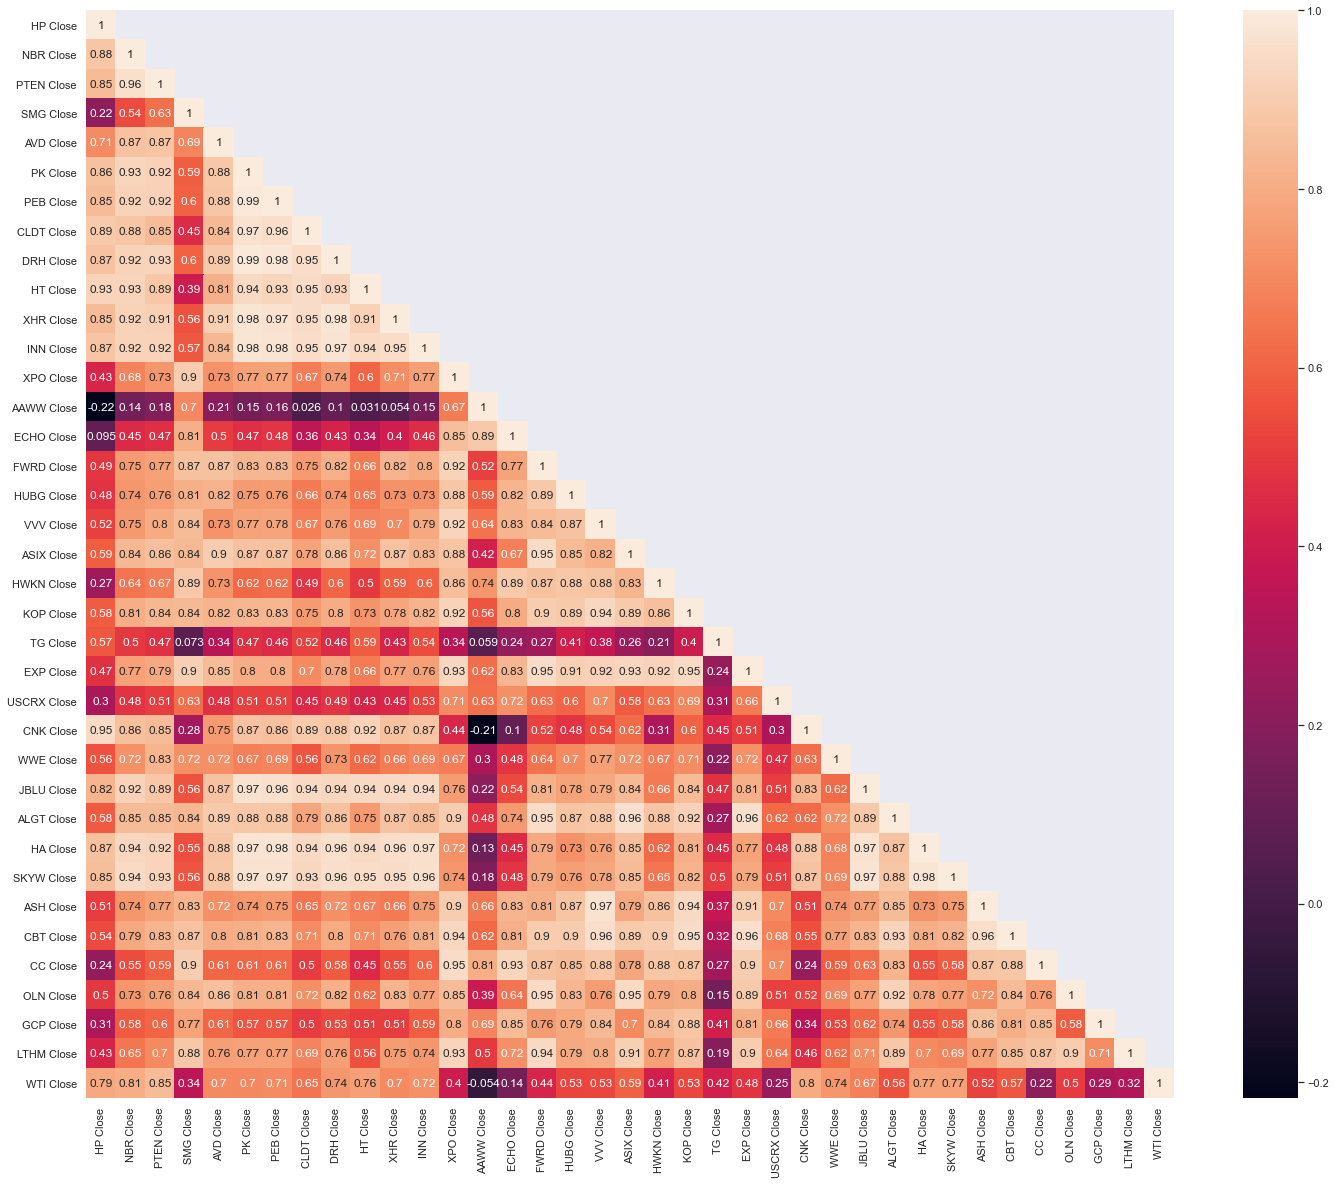

In [38]:
# checking correlation values
cor= df[perc_cols].corr()
#creating a heatmap to visualize the correlation between the numeric columns
mask = np.array(cor)
mask[ np.tril_indices_from(mask) ] = False
fig, ax = plt.subplots()
fig.set_size_inches(25,20)
sns.heatmap(cor, mask=mask, vmax=1, square=True, annot=True);

# Regression Analysis I: Stock Price vs WTI

### Creating X & Y

In [39]:
X = df[perc_cols[0:36]]
X.head()

,HP Close,NBR Close,PTEN Close,SMG Close,AVD Close,PK Close,PEB Close,CLDT Close,DRH Close,HT Close,...,JBLU Close,ALGT Close,HA Close,SKYW Close,ASH Close,CBT Close,CC Close,OLN Close,GCP Close,LTHM Close
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,103.291585,101.098901,98.885350,97.729723,105.057774,104.511284,103.683036,101.971609,103.669725,104.596623,...,103.039514,105.295940,108.381661,105.591502,103.127623,110.603679,99.293785,114.510490,103.496492,131.519700
2,111.091227,113.186813,107.165605,99.848649,114.450865,106.419902,105.747762,106.782318,106.028834,108.630394,...,105.091193,106.029545,112.493405,110.097050,106.618268,115.275590,106.920904,124.300717,112.820524,128.893058
3,110.912340,108.241758,85.191083,98.270264,108.236979,107.634483,105.915173,106.072539,106.290957,107.317073,...,100.455927,102.050039,106.220353,103.974127,108.237914,111.601044,104.519774,121.678304,110.722611,118.386492
4,106.797860,107.692308,90.445860,98.032424,95.953743,106.535576,104.743292,104.731861,104.587156,104.971857,...,99.392105,96.824437,103.900896,104.043438,111.533082,109.238834,95.762712,117.307675,107.692308,106.378987


In [40]:
y = df[perc_cols[-1]]

In [41]:
X.shape

(293, 36)

### Splitting between test and train

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [44]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [45]:
#Using the RFE approach to initially select the features
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [46]:
col1 = X_train.columns[rfe.support_]
col1

Index(['PTEN Close', 'SMG Close', 'AVD Close', 'PEB Close', 'CLDT Close',
       'INN Close', 'HUBG Close', 'ASIX Close', 'CNK Close', 'ALGT Close',
       'HA Close', 'SKYW Close', 'CBT Close', 'GCP Close', 'LTHM Close'],
      dtype='object')

In [47]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col1]

In [48]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [49]:
lm1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [50]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              WTI Close   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     314.7
Date:                Thu, 30 Dec 2021   Prob (F-statistic):          1.71e-138
Time:                        18:06:45   Log-Likelihood:                -698.12
No. Observations:                 234   AIC:                             1428.
Df Residuals:                     218   BIC:                             1484.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4455      1.997     -0.724      0.4

Removing CBT Close as it's p value is more than .05

### Model 2
##### Dropping CBT Close from Model 1

In [51]:
X_train_rfe = X_train_rfe.drop(["CBT Close"], axis = 1)

In [52]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [53]:
lm2 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [54]:
#Let's see the summary of the 2nd linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:              WTI Close   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     336.8
Date:                Thu, 30 Dec 2021   Prob (F-statistic):          1.64e-139
Time:                        18:06:45   Log-Likelihood:                -698.75
No. Observations:                 234   AIC:                             1428.
Df Residuals:                     219   BIC:                             1479.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9492      1.945     -0.488      0.6

P-values are within limit so we'll check for VIF values

In [55]:
#checking VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,PEB Close,64.61
12,SKYW Close,48.14
11,HA Close,45.66
6,INN Close,45.23
0,const,36.05
5,CLDT Close,34.74
10,ALGT Close,30.17
8,ASIX Close,28.27
14,LTHM Close,19.98
1,PTEN Close,17.31


The high VIF values suggest the presence of multi-colinearity in this model. We will drop PEB Close as its VIF value is more than 10

### Model 3
##### Dropping PEB Close from Model 2

In [56]:
X_train_rfe = X_train_rfe.drop(["PEB Close"], axis = 1)

In [57]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [58]:
lm3 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [59]:
#Let's see the summary of the 2nd linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:              WTI Close   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     357.1
Date:                Thu, 30 Dec 2021   Prob (F-statistic):          7.01e-140
Time:                        18:06:45   Log-Likelihood:                -701.01
No. Observations:                 234   AIC:                             1430.
Df Residuals:                     220   BIC:                             1478.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0530      1.958     -0.538      0.5

P-values are within limit so we'll check for VIF values

In [60]:
#checking VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,INN Close,44.56
11,SKYW Close,44.05
10,HA Close,39.58
0,const,36.03
9,ALGT Close,29.95
4,CLDT Close,28.54
7,ASIX Close,28.24
13,LTHM Close,18.78
1,PTEN Close,17.24
8,CNK Close,15.69


We'll drop INN Close from the model as its VIF value exceed 10.

### Model 4
##### Dropping INN Close from Model 3

In [61]:
X_train_rfe = X_train_rfe.drop(["INN Close"], axis = 1)

In [62]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [63]:
lm4 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [64]:
#Let's see the summary of the 2nd linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:              WTI Close   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     369.7
Date:                Thu, 30 Dec 2021   Prob (F-statistic):          6.59e-139
Time:                        18:06:45   Log-Likelihood:                -706.58
No. Observations:                 234   AIC:                             1439.
Df Residuals:                     221   BIC:                             1484.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6324      1.997     -0.317      0.7

P-values are within limit so we'll check for VIF values

In [65]:
#checking VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,SKYW Close,39.83
9,HA Close,35.89
0,const,35.87
8,ALGT Close,28.98
6,ASIX Close,27.74
4,CLDT Close,22.30
12,LTHM Close,17.26
7,CNK Close,15.69
1,PTEN Close,14.49
2,SMG Close,13.56


We'll drop SKYW Close from the model as its VIF value exceed 10.

### Model 5
##### Dropping SKYW Close from Model 4

In [66]:
X_train_rfe = X_train_rfe.drop(["SKYW Close"], axis = 1)

In [67]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [68]:
lm5= sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [69]:
#Let's see the summary of the 2nd linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:              WTI Close   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     352.7
Date:                Thu, 30 Dec 2021   Prob (F-statistic):          6.79e-134
Time:                        18:06:45   Log-Likelihood:                -721.96
No. Observations:                 234   AIC:                             1468.
Df Residuals:                     222   BIC:                             1509.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7209      1.597      4.208      0.0

P-values are within limit so we'll check for VIF values

In [70]:
#checking VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,HA Close,27.96
6,ASIX Close,27.60
8,ALGT Close,23.47
4,CLDT Close,20.52
0,const,20.21
11,LTHM Close,15.37
7,CNK Close,15.17
1,PTEN Close,14.27
2,SMG Close,13.52
3,AVD Close,11.18


We'll drop HA Close from the model as its VIF value is more than 10

### Model 6
##### Dropping HA Close from Model 5

In [71]:
X_train_rfe = X_train_rfe.drop(["HA Close"], axis = 1)

In [72]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [73]:
lm2 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [74]:
#Let's see the summary of the 2nd linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:              WTI Close   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     269.4
Date:                Thu, 30 Dec 2021   Prob (F-statistic):          1.62e-118
Time:                        18:06:46   Log-Likelihood:                -762.38
No. Observations:                 234   AIC:                             1547.
Df Residuals:                     223   BIC:                             1585.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2547      1.893      3.833      0.0

We'll drop AVD close as its p-value is more than .05

### Model 7
##### Dropping AVD Close from Model 6

In [75]:
X_train_rfe = X_train_rfe.drop(["AVD Close"], axis = 1)

In [76]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [77]:
lm2 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [78]:
#Let's see the summary of the 2nd linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:              WTI Close   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     299.8
Date:                Thu, 30 Dec 2021   Prob (F-statistic):          1.20e-119
Time:                        18:06:46   Log-Likelihood:                -762.67
No. Observations:                 234   AIC:                             1545.
Df Residuals:                     224   BIC:                             1580.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8195      1.797      3.794      0.0

We'll drop CLDT close as its p-value is more than .05

### Model 8
##### Dropping weekday_Sunday from Model 1

In [79]:
X_train_rfe = X_train_rfe.drop(["CLDT Close"], axis = 1)

In [80]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [81]:
lm2 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [82]:
#Let's see the summary of the 2nd linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:              WTI Close   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     337.7
Date:                Thu, 30 Dec 2021   Prob (F-statistic):          9.04e-121
Time:                        18:06:46   Log-Likelihood:                -763.04
No. Observations:                 234   AIC:                             1544.
Df Residuals:                     225   BIC:                             1575.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5498      1.768      3.705      0.0

P-values are within limit so we'll check for VIF values

In [83]:
#checking VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,ASIX Close,19.57
0,const,17.67
6,ALGT Close,17.27
1,PTEN Close,12.44
8,LTHM Close,9.29
2,SMG Close,8.82
5,CNK Close,6.74
3,HUBG Close,5.46
7,GCP Close,3.24


We'll drop ASIX close as its VIF Value is more than 10.

### Model 9
##### Dropping weekday_Sunday from Model 1

In [84]:
X_train_rfe = X_train_rfe.drop(["ASIX Close"], axis = 1)

In [85]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [86]:
lm2 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [87]:
#Let's see the summary of the 2nd linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:              WTI Close   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     316.4
Date:                Thu, 30 Dec 2021   Prob (F-statistic):          5.62e-113
Time:                        18:06:46   Log-Likelihood:                -784.79
No. Observations:                 234   AIC:                             1586.
Df Residuals:                     226   BIC:                             1613.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5376      1.936      3.377      0.0

P-values are within limit so we'll check for VIF values

In [88]:
#checking VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,17.67
5,ALGT Close,11.51
1,PTEN Close,10.88
2,SMG Close,8.80
7,LTHM Close,7.59
4,CNK Close,6.61
3,HUBG Close,5.45
6,GCP Close,3.16


We'll drop ALGT close as its VIF Value is more than 10.

### Model 10
##### Dropping weekday_Sunday from Model 1

In [89]:
X_train_rfe = X_train_rfe.drop(["ALGT Close"], axis = 1)

In [90]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [91]:
lm2 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [92]:
#Let's see the summary of the 2nd linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:              WTI Close   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     340.4
Date:                Thu, 30 Dec 2021   Prob (F-statistic):          1.75e-110
Time:                        18:06:46   Log-Likelihood:                -793.82
No. Observations:                 234   AIC:                             1602.
Df Residuals:                     227   BIC:                             1626.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1039      1.908      4.772      0.0

In [93]:
#checking VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,15.96
1,PTEN Close,10.41
2,SMG Close,8.55
4,CNK Close,6.43
6,LTHM Close,5.98
3,HUBG Close,4.91
5,GCP Close,3.15


As the VIF and p-value are within limits, we'll go ahead with this model

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [94]:
#predicting the dependent variable for the training data-set
y_train_cnt = lm2.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

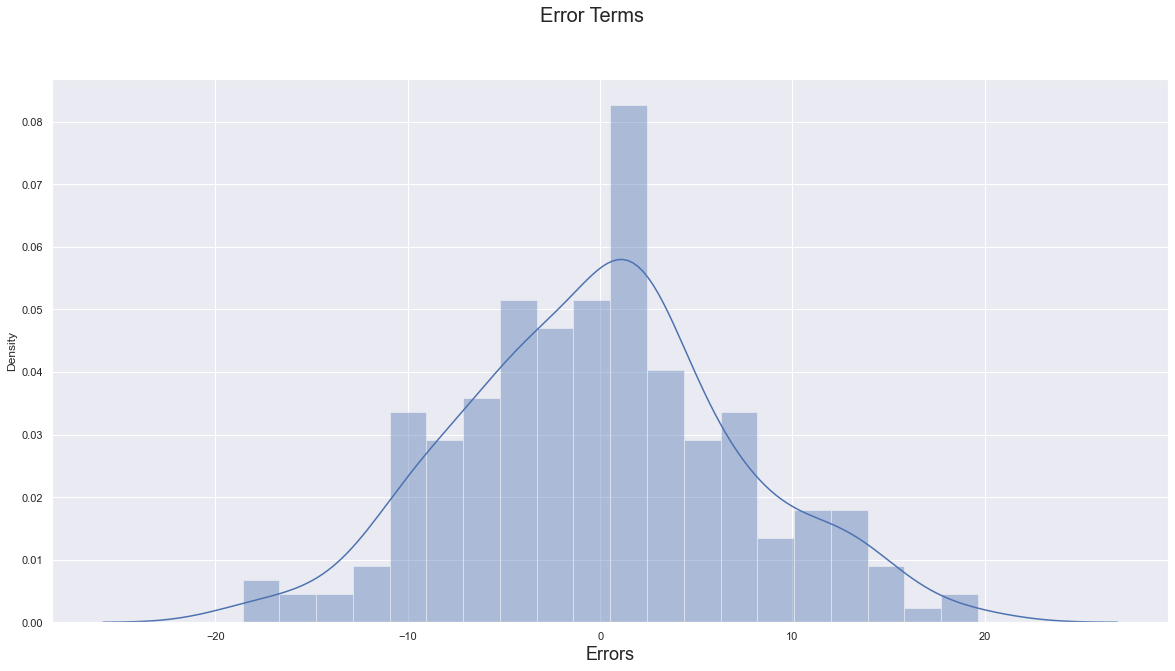

In [95]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                      # X-label

In [96]:
MSE= mean_squared_error(y_train, y_train_cnt)
RMSE= np.sqrt(MSE)
print("RMSE:", + RMSE)

RMSE: 7.1954387768158945


## Making Predictions

#### Dividing into X_test and y_test

In [97]:
# Now let's use our model to make predictions.
X_train_rfe= X_train_rfe.drop(["const"], axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [98]:
# Making predictions
y_pred = lm2.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

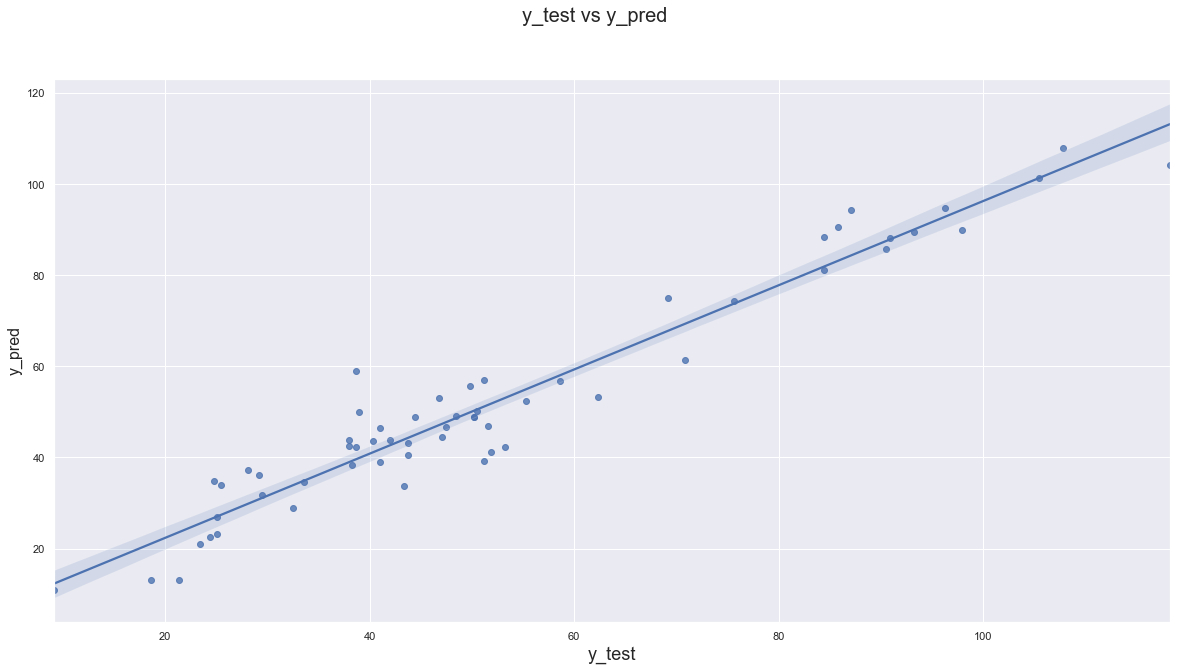

In [99]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.regplot(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'Cnt')

<Figure size 1440x720 with 0 Axes>

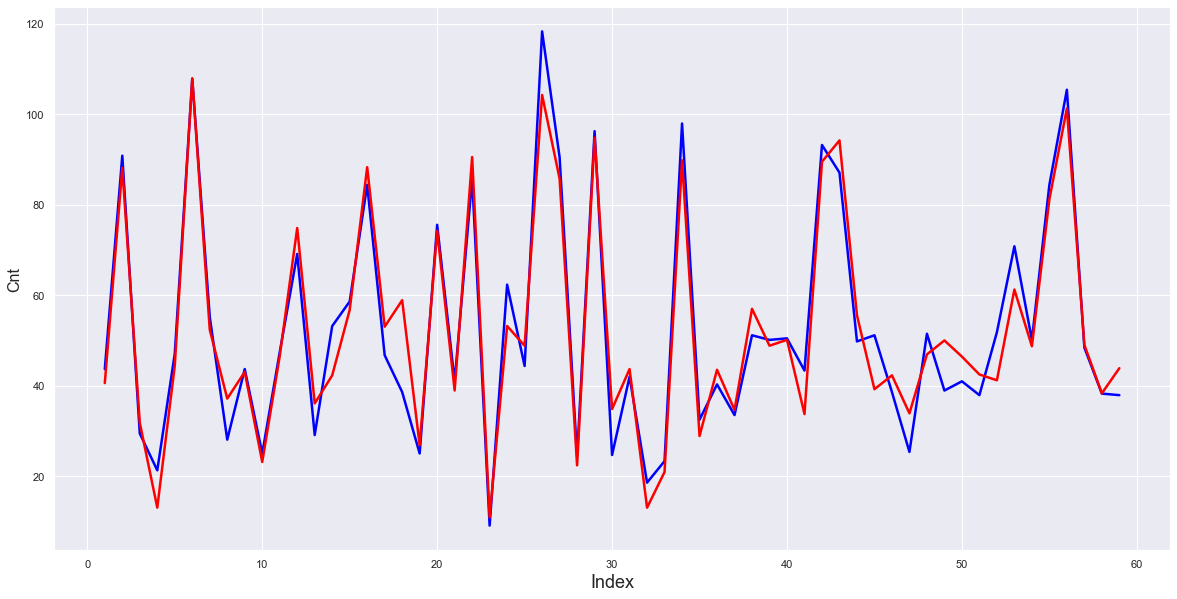

In [100]:
#Actual vs Predicted
c = [i for i in range(1,60,1)]
fig = plt.figure()
plt.figure(figsize=(20,10))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Cnt', fontsize=16)                               # Y-label

##### The y_pred and y_test value overlap fairly often for the test dataset so we can say that it is a good model for the given dataset.
###### We'll now check the Rsqr and RMSE values to verify if they are near the train values

In [101]:
MSE= mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(MSE)
print("RMSE:",+ RMSE)

RMSE: 6.346759162104878


In [102]:
r_squared = r2_score(y_test, y_pred)
print("r_squared:",+ r_squared)

r_squared: 0.9367656879145574


# II. WTI VS COVID

## Correlation for Covid Data

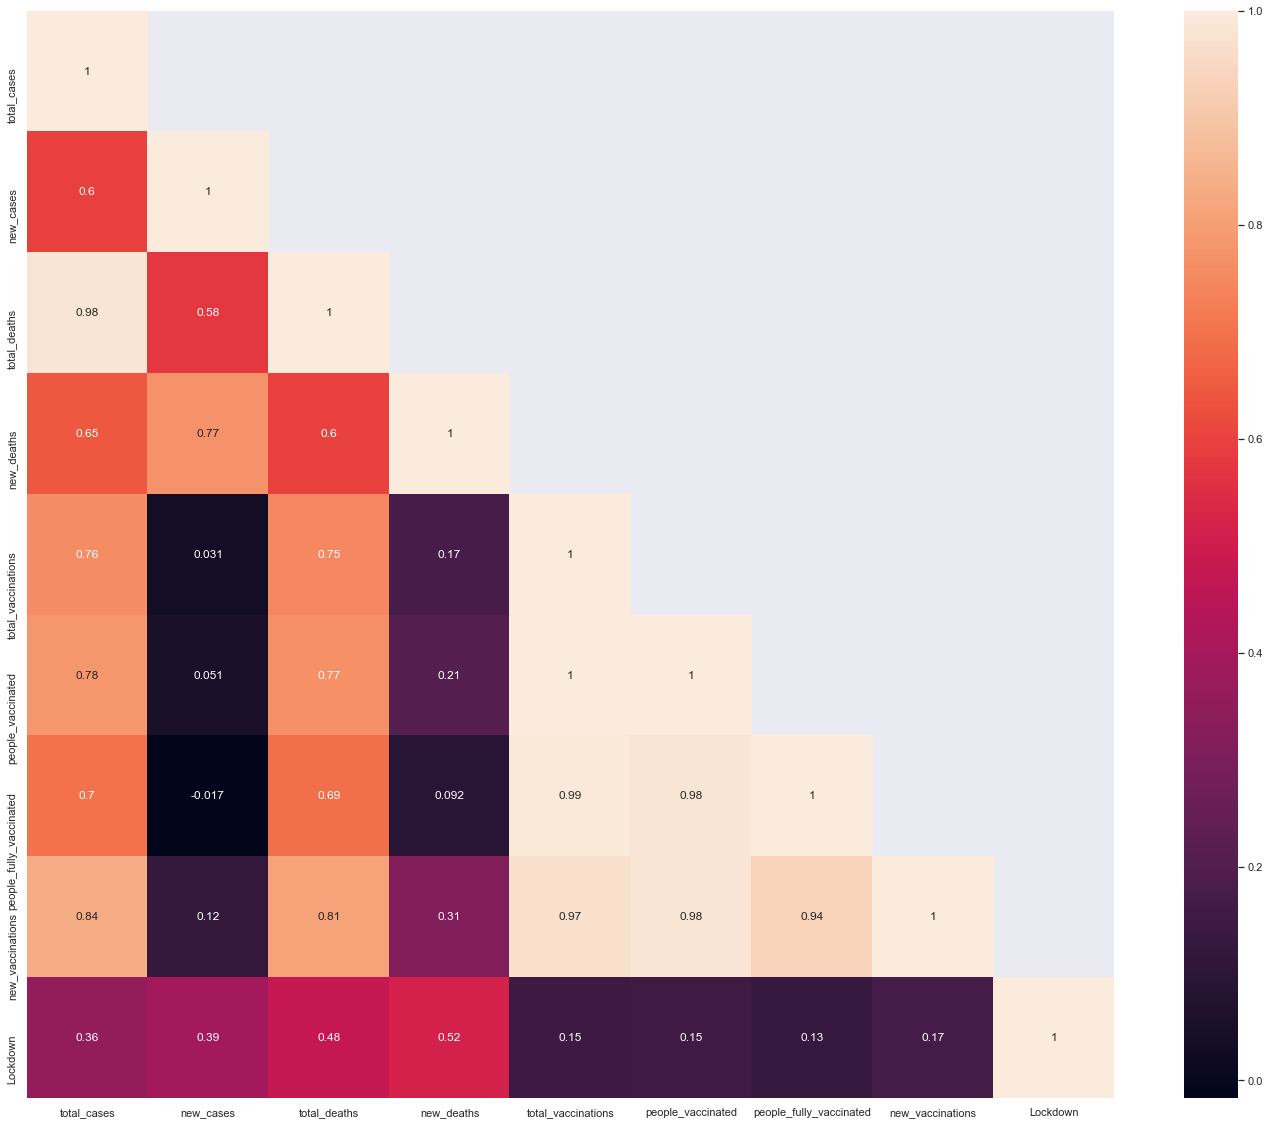

In [103]:
# checking correlation values
cor= covid_avg.corr()
#creating a heatmap to visualize the correlation between the numeric columns
mask = np.array(cor)
mask[ np.tril_indices_from(mask) ] = False
fig, ax = plt.subplots()
fig.set_size_inches(25,20)
sns.heatmap(cor, mask=mask, vmax=1, square=True, annot=True);

# Regression Analysis II: Stock Price vs WTI

### Creating X & Y

In [104]:
X = covid_avg[covid_avg.columns[1:]].reset_index(drop=True)
X.head()

,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,Lockdown
0,0.000000e+00,2.345700e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.603028e-09,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.980908e-08,7.819000e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.301514e-08,7.819000e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.622120e-08,7.819000e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
x_col=['new_cases', 'new_deaths','new_vaccinations', 'people_fully_vaccinated','Lockdown']

In [106]:
X= X[x_col]

In [107]:
y = df[perc_cols[-1]][4:].reset_index(drop=True)

In [108]:
X.shape

(289, 5)

### Splitting between test and train

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, test_size=0.3, random_state=100
) 

In [110]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [111]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [112]:
#Using the RFE approach to initially select the features
rfe = RFE(lm, 5)
rfe = rfe.fit(X_train, y_train)

In [113]:
col1 = X_train.columns[rfe.support_]
col1

Index(['new_cases', 'new_deaths', 'new_vaccinations',
       'people_fully_vaccinated', 'Lockdown'],
      dtype='object')

In [114]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col1]

In [115]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [116]:
lm1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [117]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              WTI Close   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     35.36
Date:                Thu, 30 Dec 2021   Prob (F-statistic):           1.07e-25
Time:                        18:06:47   Log-Likelihood:                -846.21
No. Observations:                 202   AIC:                             1704.
Df Residuals:                     196   BIC:                             1724.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Removing new_vaccinations as it's p value is more than .05

### Model 2
##### Dropping new_vaccinations from Model 1

In [118]:
X_train_rfe = X_train_rfe.drop(["new_vaccinations"], axis = 1)

In [119]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [120]:
lm2 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [121]:
#Let's see the summary of the 2nd linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:              WTI Close   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     44.42
Date:                Thu, 30 Dec 2021   Prob (F-statistic):           1.51e-26
Time:                        18:06:48   Log-Likelihood:                -846.22
No. Observations:                 202   AIC:                             1702.
Df Residuals:                     197   BIC:                             1719.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [122]:
#checking VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.58
2,new_deaths,2.89
1,new_cases,2.51
4,Lockdown,1.38
3,people_fully_vaccinated,1.03


As the VIF and p-value are within limits, we'll go ahead with this model.

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [123]:
#predicting the dependent variable for the training data-set
y_train_cnt = lm2.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

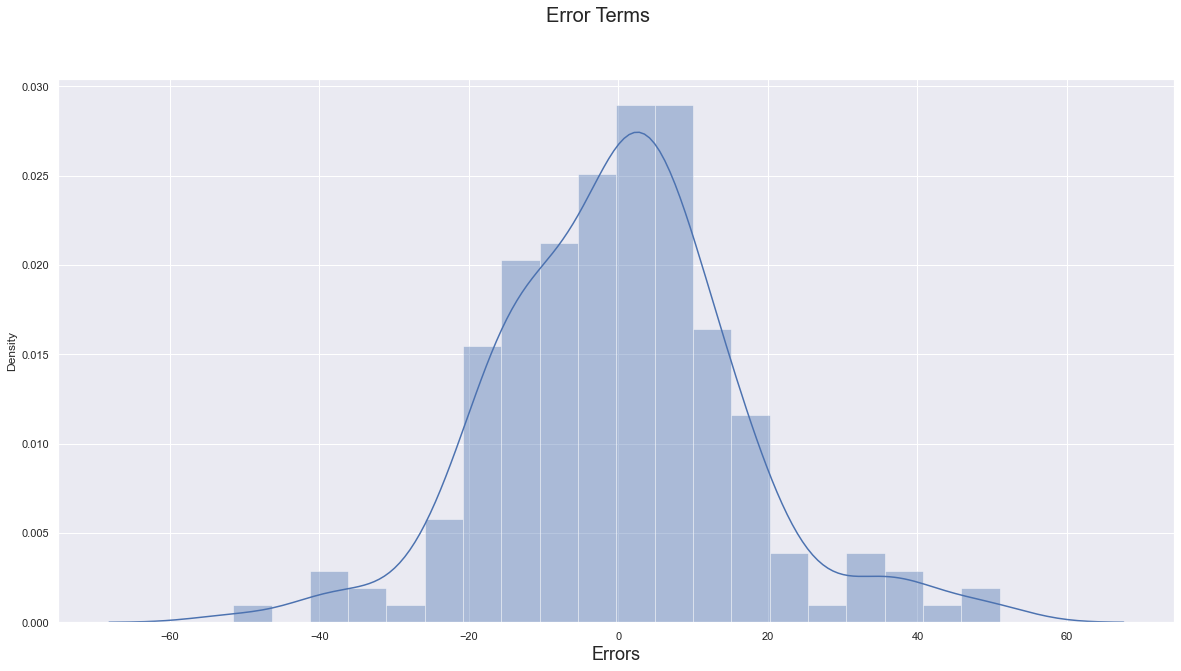

In [124]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                      # X-label

In [125]:
MSE= mean_squared_error(y_train, y_train_cnt)
RMSE= np.sqrt(MSE)
print("RMSE:", + RMSE)

RMSE: 15.962840817040062


## Making Predictions

#### Dividing into X_test and y_test

In [126]:
# Now let's use our model to make predictions.
X_train_rfe= X_train_rfe.drop(["const"], axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [127]:
# Making predictions
y_pred = lm2.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

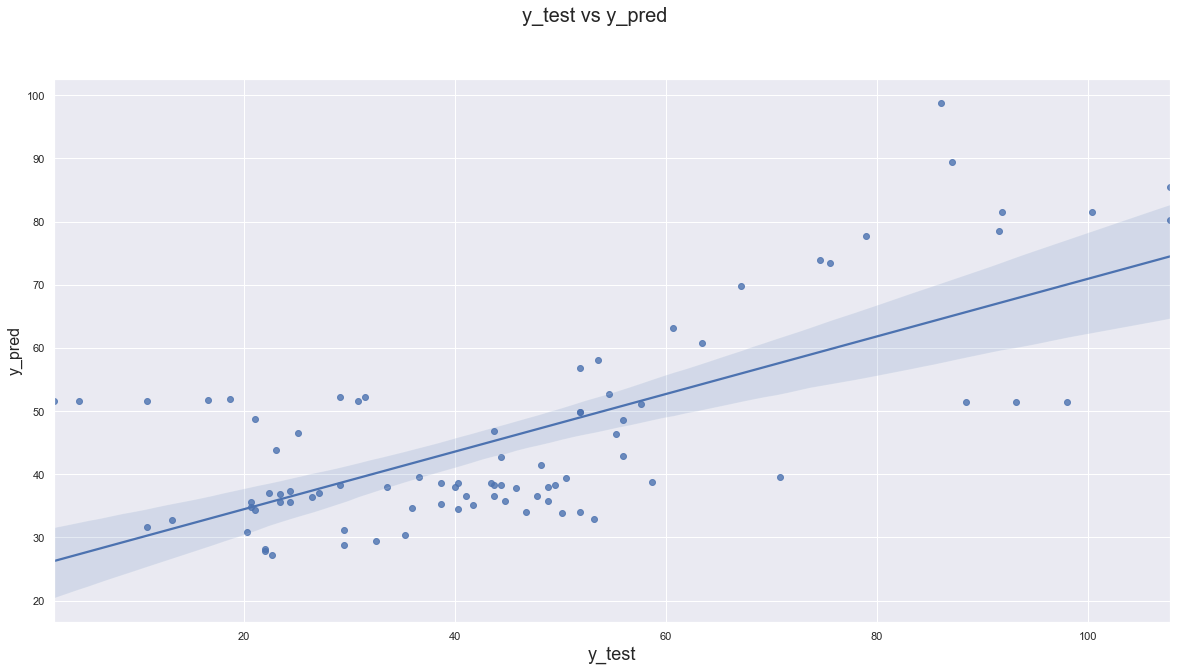

In [128]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.regplot(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'Cnt')

<Figure size 1440x720 with 0 Axes>

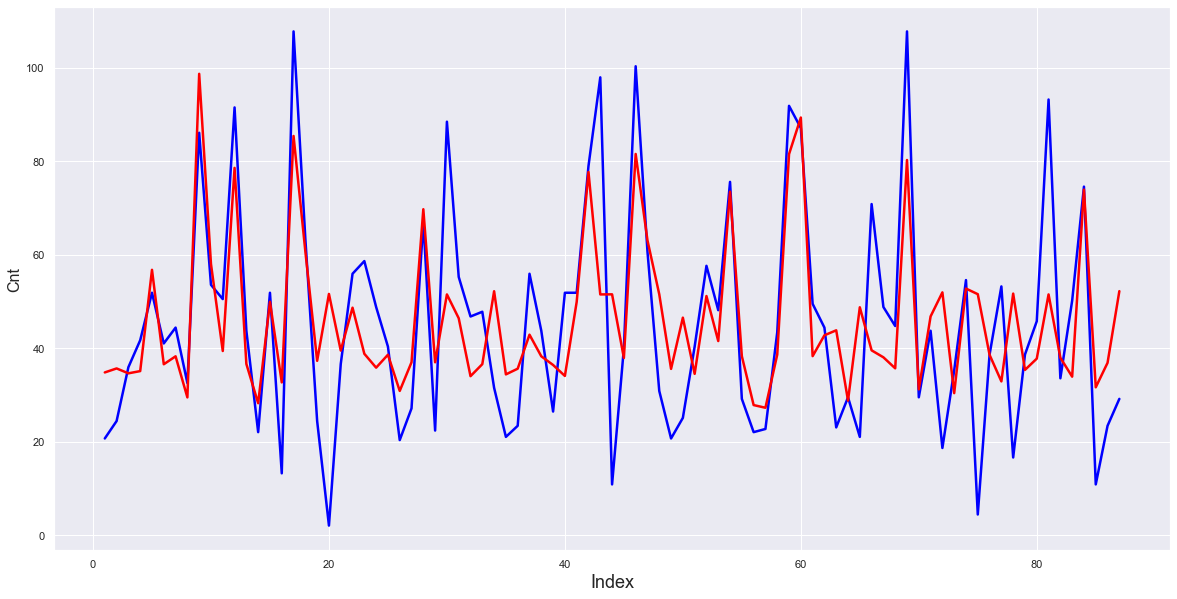

In [129]:
#Actual vs Predicted
c = [i for i in range(1,88,1)]
fig = plt.figure()
plt.figure(figsize=(20,10))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Cnt', fontsize=16)                               # Y-label

##### The y_pred and y_test value do not overlap that much so the model doesn't explain the dependent variable very well.
###### We'll now check the Rsqr and RMSE values to verify.

In [130]:
MSE= mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(MSE)
print("RMSE:",+ RMSE)

RMSE: 17.256475857440225


In [131]:
r_squared = r2_score(y_test, y_pred)
print("r_squared:",+ r_squared)

r_squared: 0.4868004123413231


# Regression Analysis III:  WTI vs Covid Indicators

In [132]:
for i in perc_cols:
    lm = LinearRegression()   # Create a linear regression object
    x= df["WTI Close"].values.reshape(-1,1)
    y= df[i].values.reshape(-1,1)
    lm.fit(x, y)
    y_train_pred= lm.predict(x)
    print("")
    print(i.upper())
    print("")
    print("Coefficient: ",round(float(lm.coef_),3))
    print("Intercept: ", round(float(lm.intercept_),3))
    print("R sqr: ",round(float(r2_score(y_true=y, y_pred=y_train_pred)),3))
    print("_____________________________________________________________________________________________")


HP CLOSE

Coefficient:  0.893
Intercept:  -7.595
R sqr:  0.627
_____________________________________________________________________________________________

NBR CLOSE

Coefficient:  1.169
Intercept:  -8.961
R sqr:  0.651
_____________________________________________________________________________________________

PTEN CLOSE

Coefficient:  1.054
Intercept:  -3.462
R sqr:  0.714
_____________________________________________________________________________________________

SMG CLOSE

Coefficient:  1.296
Intercept:  121.169
R sqr:  0.119
_____________________________________________________________________________________________

AVD CLOSE

Coefficient:  1.052
Intercept:  4.429
R sqr:  0.496
_____________________________________________________________________________________________

PK CLOSE

Coefficient:  0.9
Intercept:  7.757
R sqr:  0.487
_____________________________________________________________________________________________

PEB CLOSE

Coefficient:  0.833
Intercept:  15.332

# Regression Analysis IV:  WTI vs Covid Indicators

In [133]:
for i in covid_avg.columns[1:]:
    lm = LinearRegression()   # Create a linear regression object
    x= df["WTI Close"][4:].values.reshape(-1,1)
    y= covid_avg[i].values.reshape(-1,1)
    lm.fit(x, y)
    y_train_pred= lm.predict(x)
    print("")
    print(i.upper())
    print("")
    print("Coefficient: ",round(float(lm.coef_),3))
    print("Intercept: ", round(float(lm.intercept_),3))
    print("R sqr: ",round(float(r2_score(y_true=y, y_pred=y_train_pred)),3))
    print("_____________________________________________________________________________________________")


TOTAL_CASES

Coefficient:  0.006
Intercept:  0.041
R sqr:  0.175
_____________________________________________________________________________________________

NEW_CASES

Coefficient:  -0.001
Intercept:  0.338
R sqr:  0.008
_____________________________________________________________________________________________

TOTAL_DEATHS

Coefficient:  0.005
Intercept:  0.149
R sqr:  0.153
_____________________________________________________________________________________________

NEW_DEATHS

Coefficient:  0.001
Intercept:  0.31
R sqr:  0.016
_____________________________________________________________________________________________

TOTAL_VACCINATIONS

Coefficient:  0.006
Intercept:  -0.191
R sqr:  0.416
_____________________________________________________________________________________________

PEOPLE_VACCINATED

Coefficient:  0.006
Intercept:  -0.191
R sqr:  0.414
_____________________________________________________________________________________________

PEOPLE_FULLY_VACCINATED

C

## Covid vs Stock Price

In [200]:
Covid_param= ['new_deaths','people_fully_vaccinated','Lockdown']

In [206]:
for column in perc_cols:
    print("")
    print(column+":")
    for i in Covid_param:
        lm = LinearRegression()   # Create a linear regression object
        x= df[column][4:].values.reshape(-1,1)
        y= covid_avg[i].values.reshape(-1,1)
        lm.fit(x, y)
        y_train_pred= lm.predict(x)
        print("")
        print(i.upper())
        print("")
        print("Coefficient: ",round(float(lm.coef_),3))
        print("Intercept: ", round(float(lm.intercept_),3))
        print("R sqr: ",round(float(r2_score(y_true=y, y_pred=y_train_pred)),3))
    print("_____________________________________________________________________________________________")


HP Close:

NEW_DEATHS

Coefficient:  0.001
Intercept:  0.352
R sqr:  0.005

PEOPLE_FULLY_VACCINATED

Coefficient:  0.003
Intercept:  -0.024
R sqr:  0.135

LOCKDOWN

Coefficient:  -0.006
Intercept:  1.068
R sqr:  0.202
_____________________________________________________________________________________________

NBR Close:

NEW_DEATHS

Coefficient:  0.001
Intercept:  0.314
R sqr:  0.032

PEOPLE_FULLY_VACCINATED

Coefficient:  0.004
Intercept:  -0.096
R sqr:  0.396

LOCKDOWN

Coefficient:  -0.002
Intercept:  0.961
R sqr:  0.035
_____________________________________________________________________________________________

PTEN Close:

NEW_DEATHS

Coefficient:  0.003
Intercept:  0.239
R sqr:  0.112

PEOPLE_FULLY_VACCINATED

Coefficient:  0.004
Intercept:  -0.125
R sqr:  0.398

LOCKDOWN

Coefficient:  -0.001
Intercept:  0.911
R sqr:  0.003
_____________________________________________________________________________________________

SMG Close:

NEW_DEATHS

Coefficient:  0.002
Intercept:  0